In [2]:
# I. Zwrocenie listy 10 najwyzej ocenianych filmow (vote_average), ktorych liczba glosow (vote_count) jest wieksza od 3 kwartyla rozkladu liczby glosow.

import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych
movies_df = pd.read_csv('tmdb_movies.csv')
genres_df = pd.read_csv('tmdb_genres.csv')

# 4. 10najwyżej ocenianych filmów z liczbą głosów > 3. kwartyla
q3 = movies_df['vote_count'].quantile(0.75)
top_rated_movies = movies_df[(movies_df['vote_count'] > q3)].nlargest(10, 'vote_average')[['title', 'vote_average', 'vote_count']]

# Wyświetlenie wyników
print(f'10 najwyżej ocenianych filmów (vote_average) z liczbą głosów (vote_count) większą od 3 kwartyla:')
print(top_rated_movies)


10 najwyżej ocenianych filmów (vote_average) z liczbą głosów (vote_count) większą od 3 kwartyla:
                         title  vote_average  vote_count
1881  The Shawshank Redemption           8.5        8205
3337             The Godfather           8.4        5893
662                 Fight Club           8.3        9413
1818          Schindler's List           8.3        4329
2294             Spirited Away           8.3        3840
2731    The Godfather: Part II           8.3        3338
3232              Pulp Fiction           8.3        8428
3865                  Whiplash           8.3        4254
65             The Dark Knight           8.2       12002
690             The Green Mile           8.2        4048


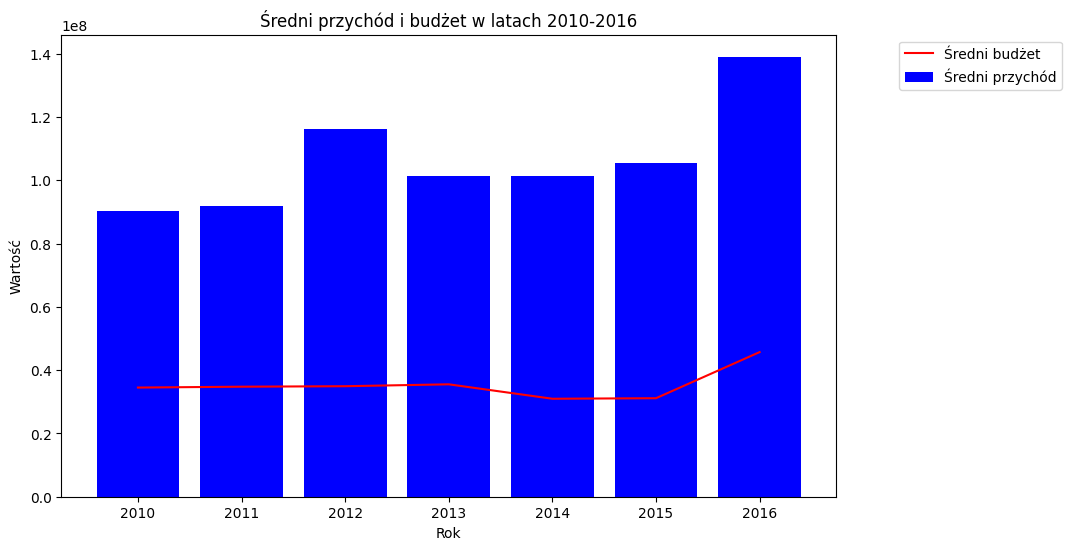

In [6]:
# II. Pogrupowanie tabeli tak aby pokazala srdni przychod oraz sredni budzet dla filmow opublikowanych od 2010 (wlacznie) do 2016 (wlacznie).

import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych
movies_df = pd.read_csv('tmdb_movies.csv')
genres_df = pd.read_csv('tmdb_genres.csv')

# Połączenie kolumny 'genre_id' z 'id' w genres_df
movies_df['genre_id'] = movies_df['genre_id'].astype(str)  # Konwersja genre_id na str
merged_df = movies_df.merge(genres_df, left_on='genre_id', right_on='genres', how='left')

# Wypełnienie brakujących wartości w kolumnie 'genres'
merged_df['genres'].fillna('Brak informacji', inplace=True)

# Filtrowanie filmów od 2010 do 2016 roku
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])
merged_df = merged_df[(merged_df['release_date'].dt.year >= 2010) & (merged_df['release_date'].dt.year <= 2016)]

# Obliczenie średnich przychodu i budżetu na podstawie roku
grouped_data = merged_df.groupby(merged_df['release_date'].dt.year)[['revenue', 'budget']].mean()

plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['revenue'], label='Średni przychód', color='blue')
plt.plot(grouped_data.index, grouped_data['budget'], label='Średni budżet', color='red')
plt.xlabel('Rok')
plt.ylabel('Wartość')
plt.title('Średni przychód i budżet w latach 2010-2016')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [6]:
#Otwieranie plikow, sprawdzenie ich typu.
import pandas as pd

# Wczytaj plik tmdb_movies.csv
movies_data = pd.read_csv('tmdb_movies.csv')

# Wyświetl kolumny i ich typy
print("Kolumny w pliku tmdb_movies.csv:")
print(movies_data.dtypes)

# Wczytaj plik tmdb_genres.csv
genres_data = pd.read_csv('tmdb_genres.csv')

# Wyświetl kolumny i ich typy
print("\nKolumny w pliku tmdb_genres.csv:")
print(genres_data.dtypes)

Kolumny w pliku tmdb_movies.csv:
Unnamed: 0             int64
budget                 int64
homepage              object
id                     int64
original_language     object
original_title        object
overview              object
popularity           float64
release_date          object
revenue                int64
runtime              float64
status                object
tagline               object
title                 object
vote_average         float64
vote_count             int64
genre_id             float64
dtype: object

Kolumny w pliku tmdb_genres.csv:
Unnamed: 0    float64
genres         object
dtype: object


In [4]:
# III. Polaczenie baz filmow tak aby w bazie filmow mozna bylo odczytac nazwe gatunku filmu.

import pandas as pd

# Wczytaj pliki CSV
movies_df = pd.read_csv('tmdb_movies.csv')
genres_df = pd.read_csv('tmdb_genres.csv')

# Konwertuj kolumnę 'genre_id' w bazie 'movies_df' na typ 'object'
movies_df['genre_id'] = movies_df['genre_id'].astype(str)

# Połącz bazy danych przez genre_id
merged_df = pd.merge(movies_df, genres_df, left_on='genre_id', right_on='genres', how='right')

# Zapisz wynik do nowego pliku CSV
merged_df.to_csv('merged_movies.csv', index=False)


W punkcie trzecim mam klopot z polaczeniem baz danych, probowalem wszystkie how, tj. right, left, inner, outer. Różnica jest taka, że w kolejnej części (punkt IV ponizej) mam informacje, że mam az jeden film w bazie z gatunku Action, albo że kolumna genres jest pusta. Podpowiedz mi, gdzie mam blad, Czy to kwestia łaczenia tabeli punkt III czy blad lezy w czesci IV.

In [40]:
# IV: Jaki gatunek filmu pojawia sie najczesciej. Ile filmow tego gatunku znajduje sie w bazie.

import pandas as pd

# Wczytaj plik CSV
merged_df = pd.read_csv('merged_movies.csv')

# Sprawdź, czy kolumna 'genres' istnieje w ramce danych
if 'genres' in merged_df.columns:
    # Sprawdź, czy istnieją jakiekolwiek dane w kolumnie 'genres'
    if not merged_df['genres'].isnull().all():
        most_common_genre = merged_df['genres'].value_counts().idxmax()
        num_movies_with_most_common_genre = merged_df[merged_df['genres'] == most_common_genre].shape[0]

        print(f"Najczęściej pojawiający się gatunek filmu to: {most_common_genre}")
        print(f"Ilość filmów tego gatunku w bazie: {num_movies_with_most_common_genre}")
    else:
        print("Brak danych w kolumnie 'genres'.")
else:
    print("Brak kolumny 'genres' w pliku CSV.")


Najczęściej pojawiający się gatunek filmu to: Action
Ilość filmów tego gatunku w bazie: 1


In [41]:
import pandas as pd

# Wczytaj pliki CSV
movies_df = pd.read_csv('tmdb_movies.csv')
genres_df = pd.read_csv('tmdb_genres.csv', header=None, names=['genre_name'])

# Ustaw kolumnę 'genre_id' jako indeks w movies_df
movies_df.set_index('genre_id', inplace=True)

# Zamień identyfikatory gatunków na ich nazwy w movies_df
movies_df['genre_name'] = genres_df['genre_name']

# Zapisz wynik do nowego pliku CSV
movies_df.to_csv('merged_movies.csv', index=False)


ValueError: cannot reindex on an axis with duplicate labels